### Import Libraries

In [2]:
#data analysis tools
import pandas as pd
import numpy as np
import statistics

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import cross_val_score


### Data Cleaning

In [4]:
df = pd.read_csv("E:\\breast_cancer_wisconsin_dataset.csv")
df.shape

(569, 33)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

**Renaming columns to improve readability and ensure consistency.**  

In [8]:
rename_dictionary = {
    'id':'ID',
    'diagnosis':'Diagnosis',
    'radius_mean':'Mean Radius',
    'texture_mean':'Mean Texture',
    'perimeter_mean':'Mean Perimeter',
    'area_mean':'Mean Area',
    'smoothness_mean':'Mean Smoothness',
    'compactness_mean':'Mean Compactness',
    'concavity_mean':'Mean Concavity',
    'concave points_mean':'Mean Concave Points',
    'symmetry_mean':'Mean Symmetry',
    'fractal_dimension_mean':'Mean Fractal Dimension',
    'radius_se':'Standard Error Radius',
    'texture_se':'Standard Error Texture',
    'perimeter_se':'Standard Error Perimeter',
    'area_se':'Standard Error Area',
    'smoothness_se':'Standard Error Smoothness',
    'compactness_se':'Standard Error Compactness',
    'concavity_se':'Standard Error Concavity',
    'concave points_se':'Standard Error Concave Points',
    'symmetry_se':'Standard Error Symmetry',
    'fractal_dimension_se':'Standard Error Fractal Dimension',
    'radius_worst':'Worst Radius',
    'texture_worst':'Worst Texture',
    'perimeter_worst':'Worst Perimeter',
    'area_worst':'Worst Area',
    'smoothness_worst':'Worst Smoothness',
    'compactness_worst':'Worst Compactness',
    'concavity_worst':'Worst Concavity',
    'concave points_worst':'Worst Concave Points',
    'symmetry_worst':'Worst Symmetry',
    'fractal_dimension_worst':'Worst Fractal Dimension'
}

In [9]:
df = df.rename(columns = rename_dictionary)

In [10]:
print(df.columns)

Index(['ID', 'Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter',
       'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity',
       'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension',
       'Standard Error Radius', 'Standard Error Texture',
       'Standard Error Perimeter', 'Standard Error Area',
       'Standard Error Smoothness', 'Standard Error Compactness',
       'Standard Error Concavity', 'Standard Error Concave Points',
       'Standard Error Symmetry', 'Standard Error Fractal Dimension',
       'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area',
       'Worst Smoothness', 'Worst Compactness', 'Worst Concavity',
       'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension',
       'Unnamed: 32'],
      dtype='object')


In [11]:
df = df.drop('ID', axis = 1)

In [12]:
df = df.drop('Unnamed: 32', axis = 1)

In [13]:
print(df.columns)

Index(['Diagnosis', 'Mean Radius', 'Mean Texture', 'Mean Perimeter',
       'Mean Area', 'Mean Smoothness', 'Mean Compactness', 'Mean Concavity',
       'Mean Concave Points', 'Mean Symmetry', 'Mean Fractal Dimension',
       'Standard Error Radius', 'Standard Error Texture',
       'Standard Error Perimeter', 'Standard Error Area',
       'Standard Error Smoothness', 'Standard Error Compactness',
       'Standard Error Concavity', 'Standard Error Concave Points',
       'Standard Error Symmetry', 'Standard Error Fractal Dimension',
       'Worst Radius', 'Worst Texture', 'Worst Perimeter', 'Worst Area',
       'Worst Smoothness', 'Worst Compactness', 'Worst Concavity',
       'Worst Concave Points', 'Worst Symmetry', 'Worst Fractal Dimension'],
      dtype='object')


**Replacing the M/B values with 1/0. (1 = Malignant (M), 0 = Benign (B))**

In [15]:
df['Diagnosis'] = df['Diagnosis'].replace({'M':1, 'B':0})

C:\Users\saulr\AppData\Local\Temp\ipykernel_30912\152109107.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'M':1, 'B':0})


In [16]:
df.head()
#Confimation that the M/B (Malignant/Benign) has been replaced with 1/0, respectively.

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Checking the DataFrame for Null-Values**

In [18]:
print(df.isna().sum())

Diagnosis                           0
Mean Radius                         0
Mean Texture                        0
Mean Perimeter                      0
Mean Area                           0
Mean Smoothness                     0
Mean Compactness                    0
Mean Concavity                      0
Mean Concave Points                 0
Mean Symmetry                       0
Mean Fractal Dimension              0
Standard Error Radius               0
Standard Error Texture              0
Standard Error Perimeter            0
Standard Error Area                 0
Standard Error Smoothness           0
Standard Error Compactness          0
Standard Error Concavity            0
Standard Error Concave Points       0
Standard Error Symmetry             0
Standard Error Fractal Dimension    0
Worst Radius                        0
Worst Texture                       0
Worst Perimeter                     0
Worst Area                          0
Worst Smoothness                    0
Worst Compac

In [19]:
print('Number of Duplicated Rows: ')
print(df.duplicated().sum())

Number of Duplicated Rows: 
0


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Diagnosis                         569 non-null    int64  
 1   Mean Radius                       569 non-null    float64
 2   Mean Texture                      569 non-null    float64
 3   Mean Perimeter                    569 non-null    float64
 4   Mean Area                         569 non-null    float64
 5   Mean Smoothness                   569 non-null    float64
 6   Mean Compactness                  569 non-null    float64
 7   Mean Concavity                    569 non-null    float64
 8   Mean Concave Points               569 non-null    float64
 9   Mean Symmetry                     569 non-null    float64
 10  Mean Fractal Dimension            569 non-null    float64
 11  Standard Error Radius             569 non-null    float64
 12  Standard

In [21]:
df.describe()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Purpose of Standardization

I am going to standardize the numerical features of the dataset. Standardization transforms each feature to have a mean of 0 and a standard deviation of 1, allowing all features to be on the same scale. This is important as this dataset has 30 numerical features, some with extraordinary ranges (eg. Mean Radius which ranges from 143.5 to 2501, while Mean Smoothness ranges from 0.05263 to 0.1634). Without standardization, the features with larger values could possibly skew the results which could lead to inaccurate predictions.
This process may permit better modeling and visualizations.


In [160]:
numerical_cols = df.columns.drop('Diagnosis')

In [161]:
df_standardized = df.copy()

In [162]:
scaler = StandardScaler()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [163]:
df_standardized.head()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [164]:
df_standardized.describe()

,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
count,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,0.372583,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,...,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16
std,0.483918,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,0.000000,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,0.000000,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,0.000000,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,1.000000,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,1.000000,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


**Visualizing the Effect of Standardization** -- *Mean Radius*

Text(0.5, 1.0, 'Mean Radius (Before Standardization)')

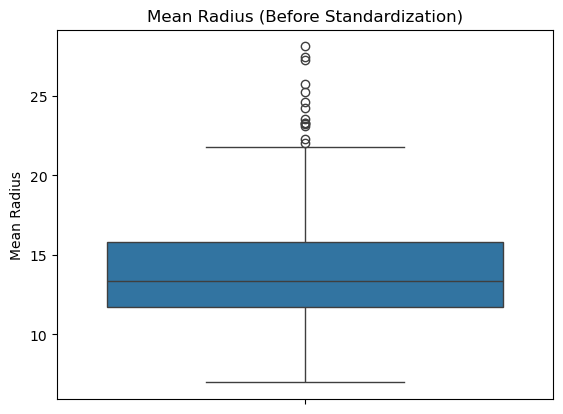

In [166]:
sns.boxplot(y = df['Mean Radius'])
plt.title('Mean Radius (Before Standardization)')

Text(0.5, 1.0, 'Mean Radius (After Standardization)')

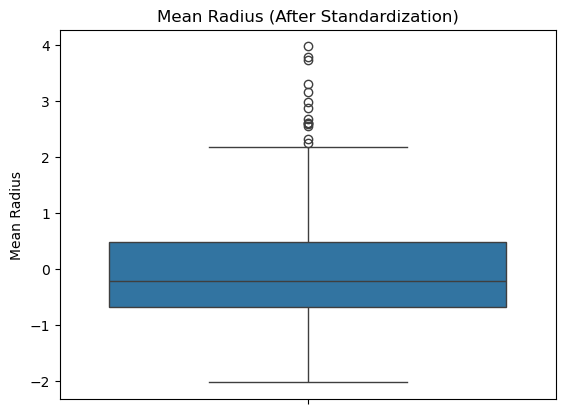

In [167]:
sns.boxplot(y = df_standardized['Mean Radius'])
plt.title('Mean Radius (After Standardization)')

### Visualizations

**Description**
-- The goal of this bar plot is to show the number of benign (0) and malignant (1) tumor samples. 

**Importance**
-- There is a greater number of benign samples than malignant samples.

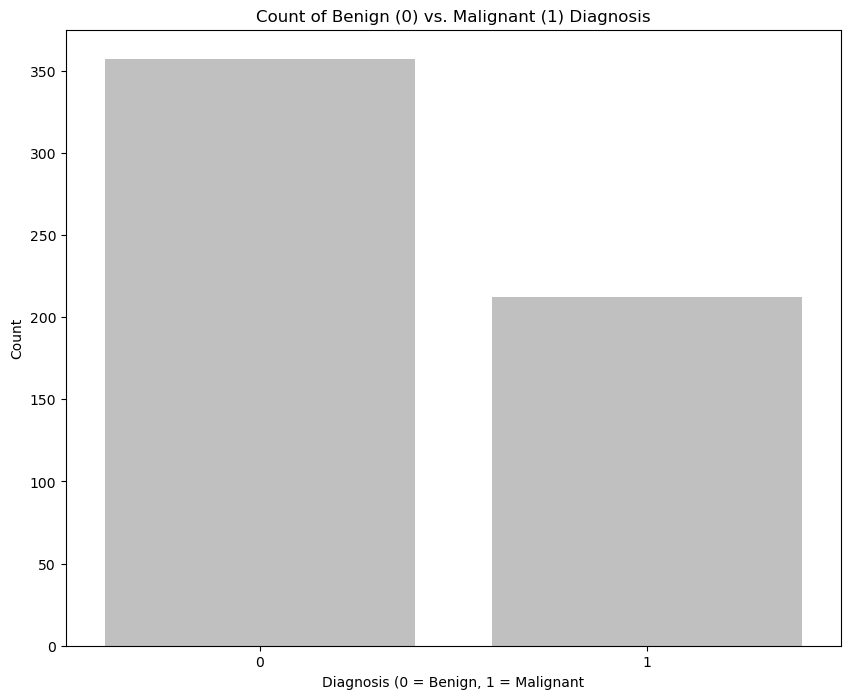

In [48]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'Diagnosis', data = df, color = 'silver')
plt.title('Count of Benign (0) vs. Malignant (1) Diagnosis')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant')
plt.ylabel('Count')
plt.savefig('diagnosis_count.png', dpi=300)

**Description**
-- The goal of this histogram is to show the distribution of Mean Radius Values across all samples.

**Importance**
-- Mean Radius will likely be a key feature in measuring tumor size. There is a large range, which suggests that there may be variation between benign and malignant tumors. 

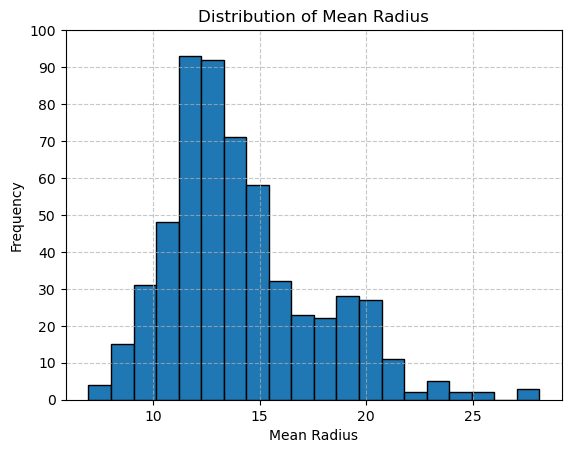

In [50]:
plt.hist(df['Mean Radius'], bins = 20,  edgecolor = 'black')
plt.grid(linestyle = '--', alpha = 0.7)
plt.yticks(range(0, 101, 10))
plt.title('Distribution of Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.savefig('mean_radius_hist.png', dpi = 300)

**Description**
-- The goal of this _interactive_ histogram is to demonstrate show the distribution of Mean Area values across all samples using _Plotly_.

**Importance** 
-- Mean Area will likely be a key feature in measuring tumor size. There is a large range, which suggests that there may be variation between benign and malignant tumors. This Plotly interactive highlights outliers that may impact diagnosis predictions, which may require the use of standardization. 

In [174]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [175]:
fig1 = px.histogram(df, x = 'Mean Area', nbins = 20, title = 'Distribution of Mean Area')
fig1.update_layout(xaxis_title = 'Mean Area', yaxis_title = 'Frequency')
fig1.write_image('mean_area_hist.png', width = 800, height = 600, scale = 2)
fig1.show()

**Description**
-- The goal of this boxplot is to demonstrate show the range, median, and outliers of the Mean Texture values across all samples using _Seaborn_.

**Importance** 
-- Mean Texture measures cell surface variability. The box plot reveals its spread and outliers, which provides insight into a feature that may contribute to diagnosis, setting up comparisons by class.

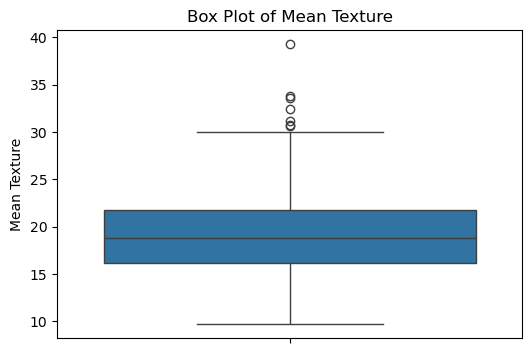

In [177]:
plt.figure(figsize = (6,4))
sns.boxplot(y = 'Mean Texture', data = df)
plt.title('Box Plot of Mean Texture')
plt.savefig('mean_texture_box.png')
plt.show()

**Description**
-- The goal of this bar plot is to demonstrate show the average values of Mean Radius, Mean Area, and Mean Concavity.

**Importance** 
-- By creating a comparison visual of key features allows for quick comparison of scale and possible importance. Here, there is a high average for Mean Area, further suggesting a significance of this feature.

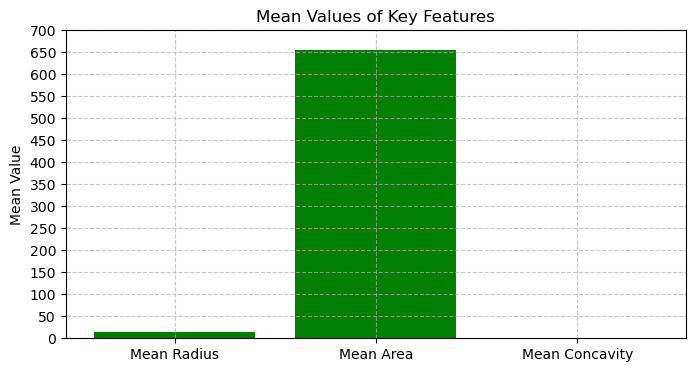

In [179]:
key_features = ['Mean Radius', 'Mean Area', 'Mean Concavity']
means = df[key_features].mean()
plt.figure(figsize = (8,4))
plt.bar(key_features, means, color = 'green')
plt.title('Mean Values of Key Features')
plt.ylabel('Mean Value')
plt.yticks(range(0, 701, 50))
plt.grid(linestyle = '--', alpha = 0.7)
plt.savefig('key_features_means.png')
plt.show()

**Description**
-- The goal of this boxplot is to compare the Mean Radius values for benign (0) and malignant (1) tumors. 

**Importance** 
-- Greater mean radius value for malignant tumors indicate that tumor size is a key differentiator, which supports the hypothesis that features can be used to predict a diagnosis.

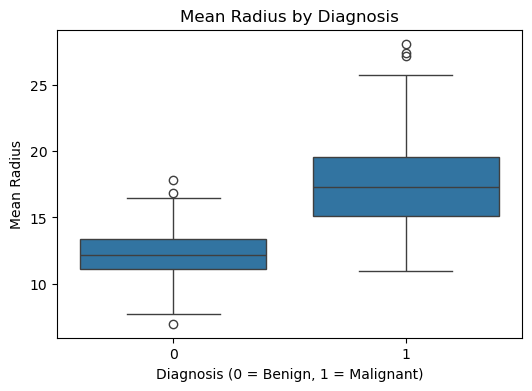

In [181]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'Diagnosis', y = 'Mean Radius', data = df)
plt.title('Mean Radius by Diagnosis')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.savefig('mean_radius_by_diagnosis')
plt.show()

**Description**
-- The goal of this Violin Plot is to compare the Worst Concave Point values for benign (0) and malignant (1) tumors. 

**Importance** 
-- Researching the key features within the dataset, Worst Concave Points measure tumor shape irregularity. Here the wider shape of malignant tumors may indicate a greater predictor for malignancy. 

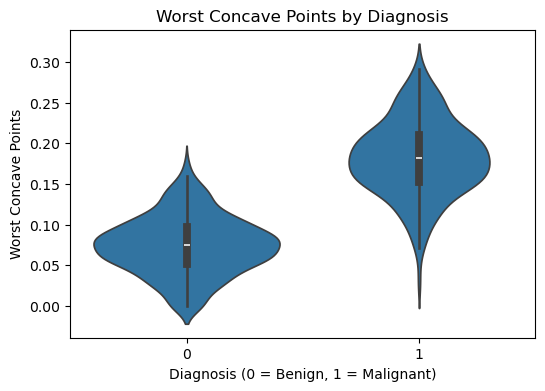

In [183]:
plt.figure(figsize = (6,4))
sns.violinplot(x = 'Diagnosis', y = 'Worst Concave Points', data = df)
plt.title('Worst Concave Points by Diagnosis')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.savefig('worst_concave_points_violinplot.png')
plt.show()

**Description**
-- The goal of this Scatter Plot is to compare Mean Radius vs. Mean Area values for benign (0) and malignant (1) tumors, colored by Diagnosis. 

**Importance** 
-- There is a clear separation of benign and malignant points which demonstrates that size-related features can be used to facilitate diagnosis. 

In [185]:
fig2 = px.scatter(df, x = 'Mean Radius', y = 'Mean Area', color = 'Diagnosis',
                 title = 'Mean Radius vs. Mean Area by Diagnosis',
                 labels = {'Diagnosis':'Diagnosis (0 = Benign, 1 = Malignant)'})
fig2.write_image('mean_radius_vs_area.png')
fig2.show()

**Description**
-- This pair plot shows pairwise relationships between Mean Radius, Mean Texture, Mean Concavity, and Worst Concave Points, colored by Diagnosis. 

**Importance** 
-- The goal here was to see feature interactions and class separation, which highlights which combinations are most predictive. 

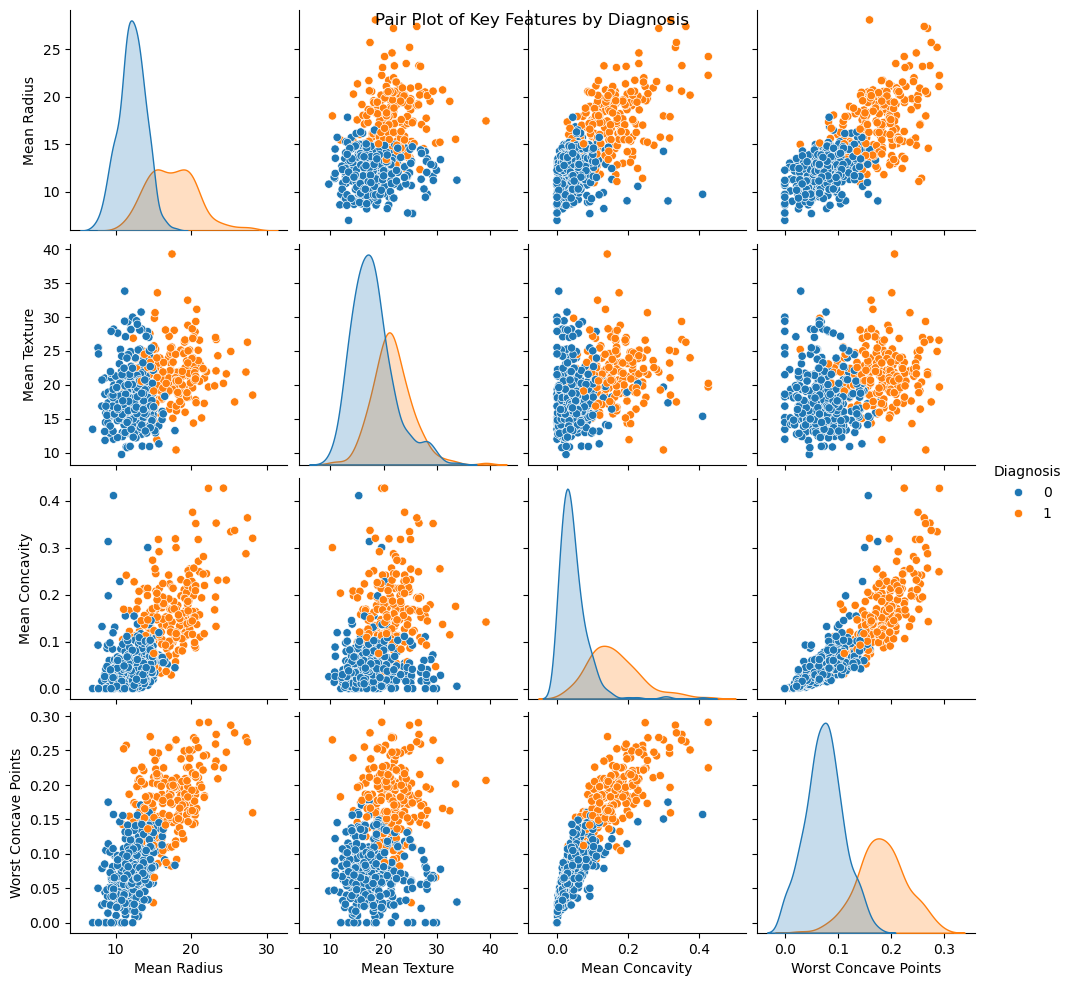

In [187]:
top_features = ['Mean Radius', 'Mean Texture', 'Mean Concavity', 'Worst Concave Points', 'Diagnosis']
sns.pairplot(df[top_features], hue = 'Diagnosis')
plt.suptitle('Pair Plot of Key Features by Diagnosis')
plt.savefig('pair_plot.png')
plt.show()

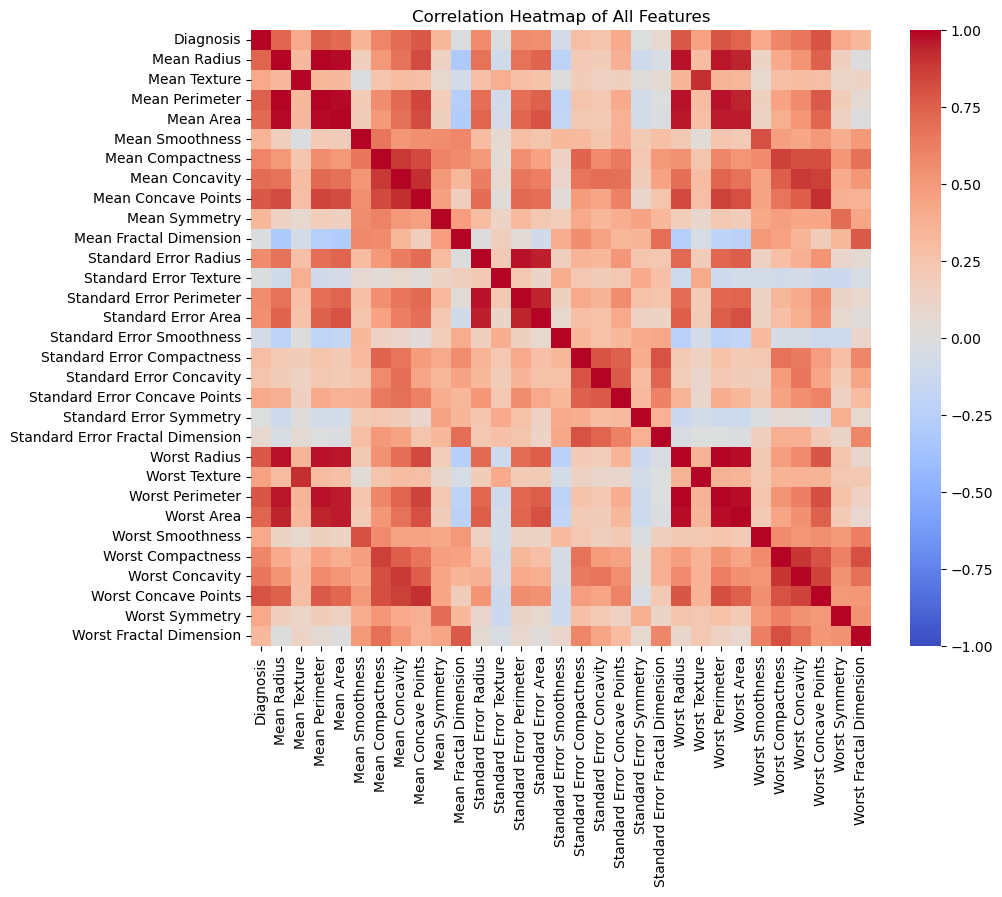

In [188]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Heatmap of All Features')
plt.savefig('correlation_heatmap.png')
plt.show()

In [223]:
correlations = df.corr()['Diagnosis'].drop('Diagnosis').sort_values()
print(correlations)

Standard Error Smoothness          -0.067016
Mean Fractal Dimension             -0.012838
Standard Error Texture             -0.008303
Standard Error Symmetry            -0.006522
Standard Error Fractal Dimension    0.077972
Standard Error Concavity            0.253730
Standard Error Compactness          0.292999
Worst Fractal Dimension             0.323872
Mean Symmetry                       0.330499
Mean Smoothness                     0.358560
Standard Error Concave Points       0.408042
Mean Texture                        0.415185
Worst Symmetry                      0.416294
Worst Smoothness                    0.421465
Worst Texture                       0.456903
Standard Error Area                 0.548236
Standard Error Perimeter            0.556141
Standard Error Radius               0.567134
Worst Compactness                   0.590998
Mean Compactness                    0.596534
Worst Concavity                     0.659610
Mean Concavity                      0.696360
Mean Area 

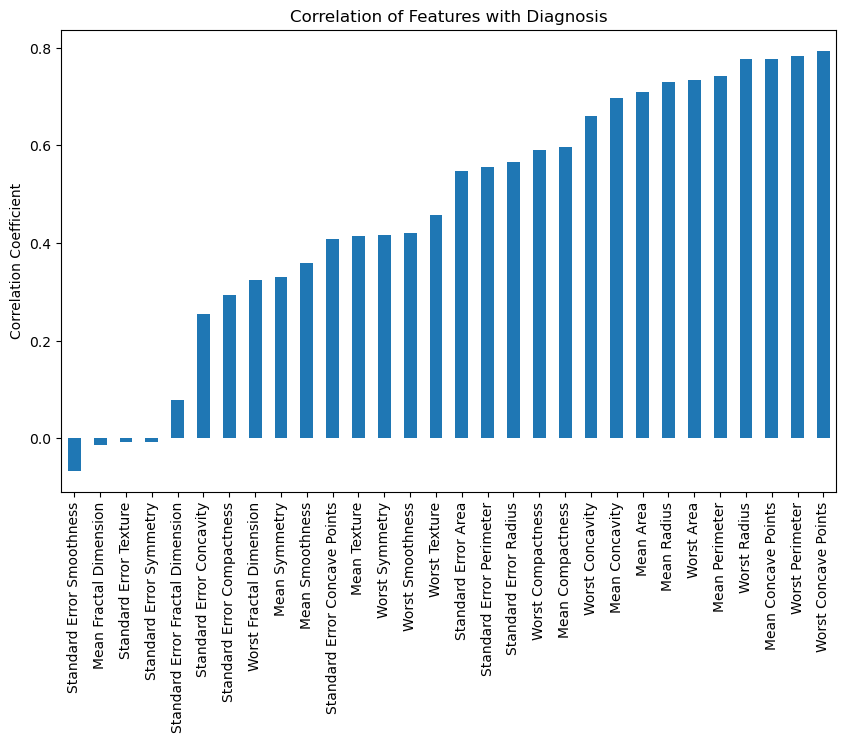

In [229]:
plt.figure(figsize = (10, 6))
correlations.plot(kind = 'bar')
plt.title('Correlation of Features with Diagnosis')
plt.ylabel('Correlation Coefficient')
plt.savefig('diagnosis_correlations.png')
plt.show()

### Advanced Analysis

In this section, the goal is 

In [232]:
X = df.drop('Diagnosis', axis = 1)
X_scaled = scaler.fit_transform(X)

In [236]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns = ['PC1', 'PC2', 'PC3'])
pca_df['Diagnosis'] = df['Diagnosis']

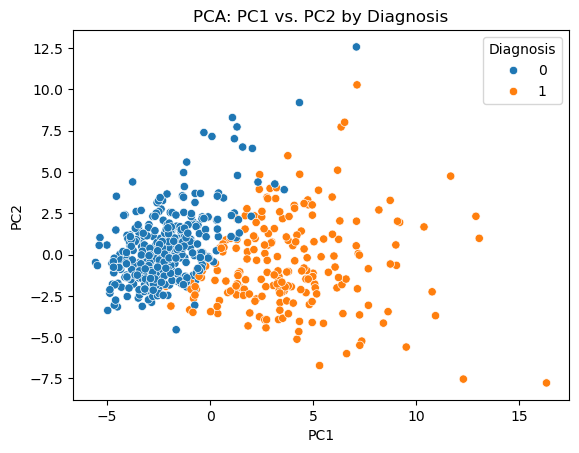

In [256]:
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Diagnosis', data = pca_df)
plt.title('PCA: PC1 vs. PC2 by Diagnosis')
plt.savefig('pca_2d.png')
plt.show()


## 3-Dimensional PCA Scatter Plot ##




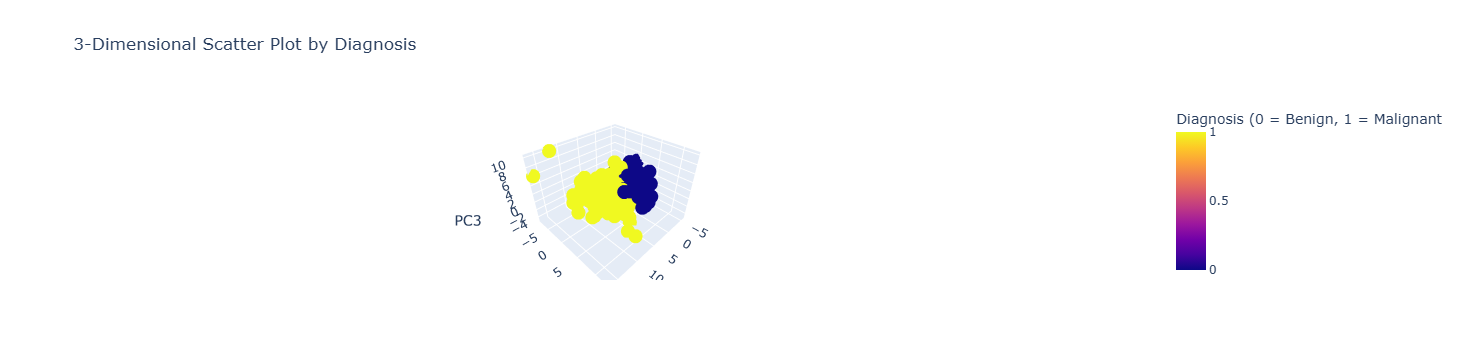

In [248]:
fig3 = px.scatter_3d(pca_df, x = 'PC1', y = 'PC2', z = 'PC3', color = 'Diagnosis', 
                     title = '3-Dimensional Scatter Plot by Diagnosis',
                     labels = {'Diagnosis': 'Diagnosis (0 = Benign, 1 = Malignant'})
fig3.write_image('pca_3d.png')
fig3.show()